In [32]:
import pandas as pd
import numpy as np
from collections import Counter
import sklearn.metrics as sm
import matplotlib.pyplot as plot

In [33]:
df=pd.read_csv("wine.csv" , delimiter='/t')

In [30]:
df=df.drop(['fruit_label', 'fruit_name' , 'fruit_subtype'] , axis = 1 )

KeyError: "['fruit_label' 'fruit_name' 'fruit_subtype'] not found in axis"

In [10]:
X = np.array(df[["mass","width","height","color_score"]])

In [11]:
X

array([[1.92e+02, 8.40e+00, 7.30e+00, 5.50e-01],
       [1.80e+02, 8.00e+00, 6.80e+00, 5.90e-01],
       [1.76e+02, 7.40e+00, 7.20e+00, 6.00e-01],
       [8.60e+01, 6.20e+00, 4.70e+00, 8.00e-01],
       [8.40e+01, 6.00e+00, 4.60e+00, 7.90e-01],
       [8.00e+01, 5.80e+00, 4.30e+00, 7.70e-01],
       [8.00e+01, 5.90e+00, 4.30e+00, 8.10e-01],
       [7.60e+01, 5.80e+00, 4.00e+00, 8.10e-01],
       [1.78e+02, 7.10e+00, 7.80e+00, 9.20e-01],
       [1.72e+02, 7.40e+00, 7.00e+00, 8.90e-01],
       [1.66e+02, 6.90e+00, 7.30e+00, 9.30e-01],
       [1.72e+02, 7.10e+00, 7.60e+00, 9.20e-01],
       [1.54e+02, 7.00e+00, 7.10e+00, 8.80e-01],
       [1.64e+02, 7.30e+00, 7.70e+00, 7.00e-01],
       [1.52e+02, 7.60e+00, 7.30e+00, 6.90e-01],
       [1.56e+02, 7.70e+00, 7.10e+00, 6.90e-01],
       [1.00e+03, 7.60e+00, 7.50e+00, 6.70e-01],
       [1.68e+02, 7.50e+00, 7.60e+00, 7.30e-01],
       [1.62e+02, 7.50e+00, 7.10e+00, 8.30e-01],
       [1.62e+02, 7.40e+00, 7.20e+00, 8.50e-01],
       [1.60e+02, 7.

In [12]:
df

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79
5,80,5.8,4.3,0.77
6,80,5.9,4.3,0.81
7,76,5.8,4.0,0.81
8,178,7.1,7.8,0.92
9,172,7.4,7.0,0.89


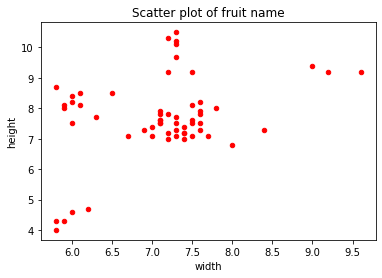

In [13]:
df.plot.scatter(x='width', y='height', title= "Scatter plot of fruit name", c='red');

In [14]:
k=4

In [32]:
centroid_index = np.random.randint(0,58,(k,))
centroids = X[centroid_index]

In [33]:
centroid_index , centroids 

(array([25, 34, 57, 49]),
 array([[356.  ,   9.2 ,   9.2 ,   0.75],
        [142.  ,   7.6 ,   7.8 ,   0.75],
        [152.  ,   6.5 ,   8.5 ,   0.72],
        [132.  ,   5.8 ,   8.7 ,   0.73]]))

In [34]:
X_ = np.delete(X,centroid_index, axis = 0)

In [44]:
clusters = [[],[],[],[]]
clusters[0].append(centroids[0])
clusters[1].append(centroids[1])
clusters[2].append(centroids[2])
clusters[3].append(centroids[3])

In [58]:
def euclidian(query,X):
        difference = np.array(X) - np.array(query)
        sqrd_diff = np.square(difference)
        sum_sqrd_diff = np.sum(sqrd_diff, axis = 1)
        distance = np.sqrt(sum_sqrd_diff)
        return distance

In [60]:
 for x in X:
        id = np.argmin(euclidian(x,centroids))
        clusters[id].append(x)

In [65]:
len(clusters[0])

6

In [66]:
len(clusters[1])

17

In [69]:
len(clusters[2])

69

In [70]:
len(clusters[3])

26

In [67]:
Z = np.array(clusters, dtype = object)

In [ ]:
Z

In [80]:
for x in range(k):
        centroids[x] = np.mean(Z[x], axis = 0)
        print("Centroid:" , centroids[x])


Centroid: [1.03433333e+04 8.26666667e+00 8.38333333e+00 7.45000000e-01]
Centroid: [146.35294118   7.06470588   7.54117647   0.76823529]
Centroid: [194.           7.44782609   8.06086957   0.76855072]
Centroid: [104.38461538   5.99230769   6.66538462   0.74923077]
